In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


1. Dataset Preprocessinng

In [2]:
#Loaded the dataset
dataset = pd.read_csv('/content/drive/MyDrive/OPTIMAL CHALLENNGE/listings.csv')

In [3]:
#SEEING THE INFO OF THE DATA
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44464 entries, 0 to 44463
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            44464 non-null  int64  
 1   listing_url                                   44464 non-null  object 
 2   scrape_id                                     44464 non-null  int64  
 3   last_scraped                                  44464 non-null  object 
 4   source                                        44464 non-null  object 
 5   name                                          44464 non-null  object 
 6   description                                   43765 non-null  object 
 7   neighborhood_overview                         26222 non-null  object 
 8   picture_url                                   44464 non-null  object 
 9   host_id                                       44464 non-null 

In [4]:
#Price is of string datatype
print(dataset['price'].describe())


count      44464
unique      1591
top       $99.00
freq        1347
Name: price, dtype: object


In [5]:
#Removing special symbols in Price Column and converting it into numerical values
dataset['price'] = dataset['price'].str.replace('[^\d.]', '', regex=True)
dataset['price'] = pd.to_numeric(dataset['price'], errors='coerce')


In [6]:
dataset['price'].dtype
print(1349/44464)
dataset['price'].describe()

0.03033915077365959


count    44464.000000
mean       279.030969
std        880.129338
min          0.000000
25%         89.000000
50%        148.000000
75%        250.000000
max      90150.000000
Name: price, dtype: float64

In [7]:
#Annalyzing the price dataset
u=dataset['price'].unique()
c=0
maxval=[]
for i in u:
  if(i>250):
    maxval.append(i)
    c+=1

import statistics

print("mean", statistics.mean(maxval))

print("median",statistics.median(maxval))

print("min",min(maxval))
print("max",max(maxval))

mean 1775.4002965159377
median 983.0
min 251.0
max 90150.0


In [8]:
#Seeing all values in the price column which is above 250
intmaxval=[]

for i in maxval:
  intval = int(i)
  intmaxval.append(intval)



print(intmaxval)

[325, 450, 350, 300, 509, 313, 417, 297, 259, 340, 550, 388, 310, 899, 379, 256, 298, 1314, 699, 1499, 284, 628, 579, 279, 709, 360, 265, 500, 308, 1100, 600, 400, 2000, 355, 319, 403, 890, 1673, 276, 285, 490, 330, 270, 1350, 273, 280, 520, 650, 329, 489, 345, 625, 290, 299, 495, 426, 459, 482, 365, 295, 257, 750, 446, 381, 2170, 252, 10000, 322, 1000, 399, 326, 349, 395, 1999, 793, 488, 281, 800, 464, 595, 338, 1566, 505, 499, 972, 850, 958, 315, 824, 511, 382, 369, 895, 1695, 5000, 302, 571, 251, 510, 320, 275, 268, 255, 725, 425, 397, 305, 914, 622, 420, 1600, 282, 2321, 344, 638, 375, 681, 385, 449, 907, 821, 377, 2507, 1240, 5857, 260, 347, 336, 370, 926, 893, 577, 463, 696, 690, 1200, 491, 424, 547, 701, 1500, 296, 264, 475, 586, 772, 552, 359, 445, 307, 1890, 575, 775, 332, 277, 601, 3000, 769, 398, 306, 485, 430, 368, 1043, 825, 266, 1737, 331, 1257, 739, 288, 312, 1528, 440, 525, 402, 666, 578, 354, 963, 291, 832, 900, 412, 546, 545, 343, 834, 9999, 3300, 1650, 757, 293, 700,

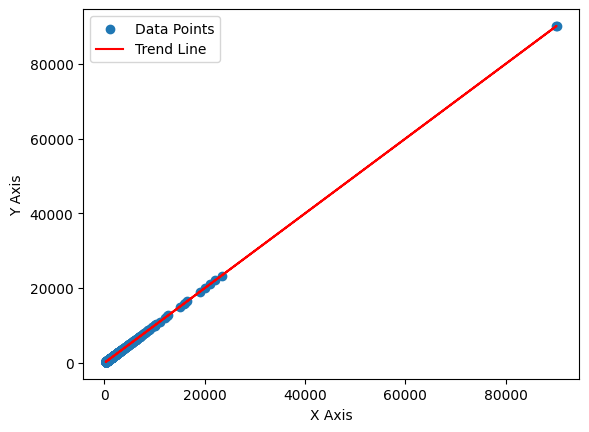

In [9]:
#trend line for extreme prices to detect high threshold

x = np.array(intmaxval)

# Calculate the trend line (fitting a first-degree polynomial)
trend_line = np.polyfit(x, x, 1)

# Create a function based on the calculated trend line
trend_line_function = np.poly1d(trend_line)

# Plot the original data
plt.scatter(x, x, label='Data Points')

# Plot the trend line
plt.plot(x, trend_line_function(x), color='red', label='Trend Line')

# Label the axes
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [10]:
#removing the above 80,000 price

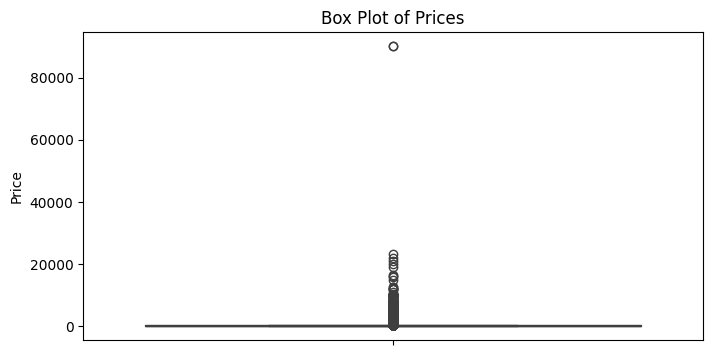

In [11]:
#boxplot with whole price

#Analyzing the data points of price through a boxplot to see if there are any potential outliers
plt.figure(figsize=(8, 4))
sns.boxplot(y=dataset['price'])
plt.title('Box Plot of Prices')
plt.ylabel('Price')
plt.show()

In [12]:
#From the boxplot, we can see the datapoints above 80000 is an outlier
#And Selecting the indexes of outliers of price
dataset[(dataset['price']>80000)]

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
14599,37976511,https://www.airbnb.com/rooms/37976511,20230606052736,2023-06-07,city scrape,Rental unit in Burbank · ★4.61 · 1 bedroom · 1...,Train Station to down town LA is right down th...,Burbank is a really nice and safe area I feel ...,https://a0.muscache.com/pictures/e9b47778-9e03...,241302189,...,4.8,4.77,4.58,NaN,f,1,1,0,0,2.41
25496,546483898096607267,https://www.airbnb.com/rooms/546483898096607267,20230606052736,2023-06-06,city scrape,Home in Compton · ★5.0 · 1 bedroom · 2 beds · ...,Keep it simple at this peaceful and centrally-...,Quite neighborhood with park right across the ...,https://a0.muscache.com/pictures/a137c497-5b85...,441812134,...,5.0,5.00,5.00,NaN,f,1,1,0,0,0.86


In [13]:
ind_drop = dataset[(dataset['price']>80000)].index
print(ind_drop)

Int64Index([14599, 25496], dtype='int64')


In [14]:
#Dropping the values of price that is above 80,0000 which is an outlier
dataset= dataset.drop(ind_drop,axis=0)

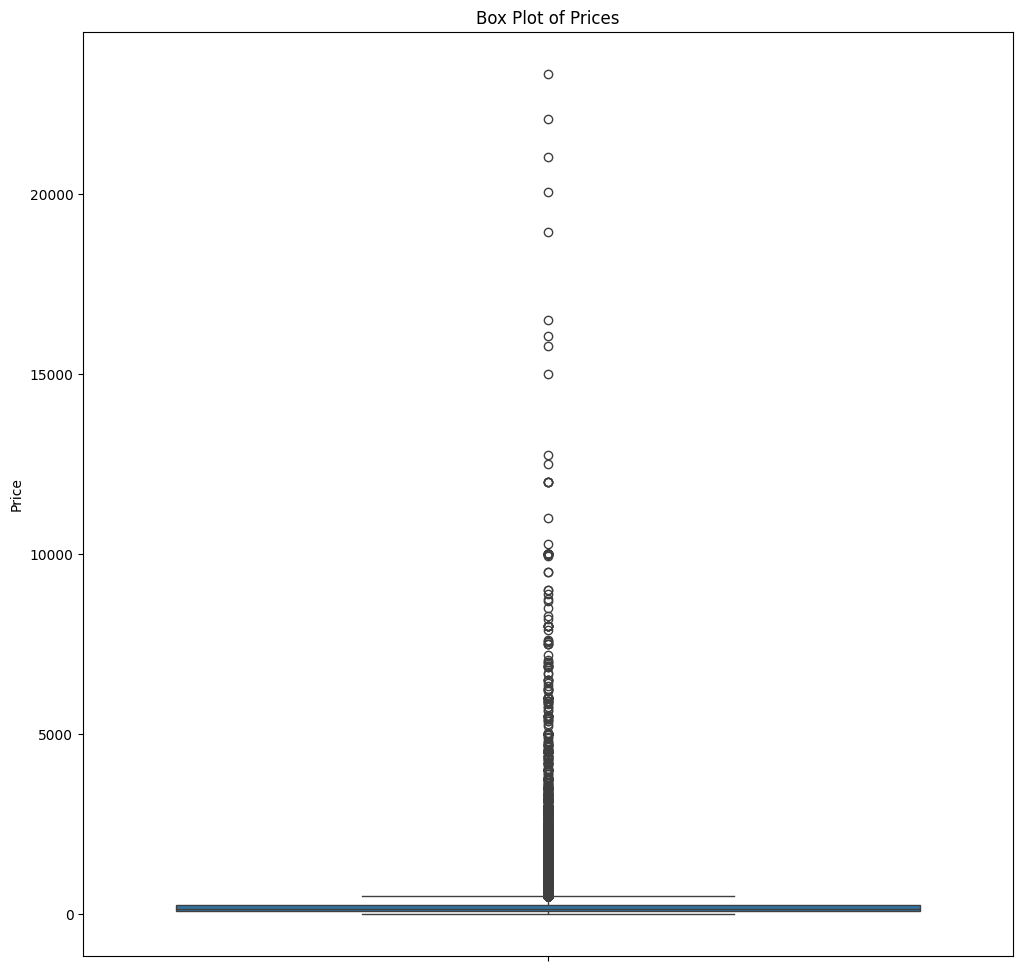

In [15]:
#Plotting the boxplot of price after removing the outliers
plt.figure(figsize=(12, 12))
sns.boxplot(y=dataset['price'])
plt.title('Box Plot of Prices')
plt.ylabel('Price')
plt.show()


In [16]:
dataset["bathrooms_text"].unique()

array(['1 private bath', '1.5 shared baths', '2 baths', '1 bath',
       '11 shared baths', '1 shared bath', '2.5 baths', '3 baths', nan,
       '1.5 baths', '2 shared baths', '8 shared baths', '8 baths',
       '8.5 shared baths', '3.5 baths', '4 baths', '0 baths', '4.5 baths',
       '2.5 shared baths', '3.5 shared baths', 'Half-bath', '5 baths',
       '3 shared baths', '11.5 shared baths', '4.5 shared baths',
       '7.5 baths', '5.5 baths', '0 shared baths', 'Shared half-bath',
       '8.5 baths', '6.5 baths', '5 shared baths', '6 baths', '9 baths',
       '7 baths', '4 shared baths', '12.5 baths', '10 baths', '9.5 baths',
       '12 baths', 'Private half-bath', '11.5 baths', '13 baths',
       '11 baths', '5.5 shared baths', '13.5 baths', '10.5 baths',
       '21 baths', '20 baths', '15 baths', '10 shared baths',
       '6 shared baths', '16 baths', '17 baths', '27 baths', '42 baths',
       '7 shared baths', '46 baths'], dtype=object)

In [17]:
#Seeing the frequency of the unique type of 'bathrooms_text' to remove the less frequent one
column_name = 'bathrooms_text'

# Calculate and display value counts without truncation
pd.set_option('display.max_rows', None)  # Set option to display all rows
value_counts = dataset[column_name].value_counts()
print(f'Value counts of \'{column_name}\':\n{value_counts}')
pd.reset_option('display.max_rows')  # Reset option to default for other displays

Value counts of 'bathrooms_text':
1 bath               18622
2 baths               6874
1 shared bath         3958
1 private bath        3730
2.5 baths             3414
3 baths               1669
1.5 baths             1534
3.5 baths              770
1.5 shared baths       757
4 baths                563
2 shared baths         533
4.5 baths              423
5.5 baths              252
5 baths                206
2.5 shared baths       197
3 shared baths         124
6 baths                110
0 shared baths          68
6.5 baths               66
Shared half-bath        63
7 baths                 60
Half-bath               57
8 baths                 57
0 baths                 54
3.5 shared baths        39
7.5 baths               29
11 shared baths         27
8.5 baths               26
9 baths                 23
8 shared baths          22
10 baths                14
Private half-bath       13
4 shared baths          11
5 shared baths          10
6 shared baths          10
11 baths             

In [18]:
# removing the frequency 1, 3, 2, 4, 5, 6, 8 types of bathrooms which were the less frequent ones
options = ['8.5 shared baths',
'7 shared baths',
'5.5 shared baths',
'46 baths',
'42 baths',
'27 baths',
'21 baths',
'20 baths',
'17 baths',
'16 baths',
'15 baths',
'13.5 baths',
'11.5 shared baths',
'10 shared baths',
'4.5 shared baths',
'13 baths',
'10.5 baths',
'12.5 baths',
'11.5 baths',
'12 baths',
'9.5 baths',
'11 baths'
]
dataset_fil1 = dataset.loc[~dataset['bathrooms_text'].isin(options)]


In [19]:
dataset_fil1['bathrooms_text'].unique()

array(['1 private bath', '1.5 shared baths', '2 baths', '1 bath',
       '11 shared baths', '1 shared bath', '2.5 baths', '3 baths', nan,
       '1.5 baths', '2 shared baths', '8 shared baths', '8 baths',
       '3.5 baths', '4 baths', '0 baths', '4.5 baths', '2.5 shared baths',
       '3.5 shared baths', 'Half-bath', '5 baths', '3 shared baths',
       '7.5 baths', '5.5 baths', '0 shared baths', 'Shared half-bath',
       '8.5 baths', '6.5 baths', '5 shared baths', '6 baths', '9 baths',
       '7 baths', '4 shared baths', '10 baths', 'Private half-bath',
       '6 shared baths'], dtype=object)

In [20]:
#transposing new columns for bathrooms (categorical to dummies) - cateogorical encoding

dataset_fil1=pd.get_dummies(dataset_fil1, columns=["bathrooms_text"])




In [21]:
#Looking at the columns of our new dataset after categorically encoding 'bathrooms_text'
for i in dataset_fil1.columns:
  print(i)

id
listing_url
scrape_id
last_scraped
source
name
description
neighborhood_overview
picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
latitude
longitude
property_type
room_type
accommodates
bathrooms
bedrooms
beds
amenities
price
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cle

In [22]:
#Finding the correlatiion of the X's with the target variable(price) in order to select our features
correlation_table = dataset_fil1.corr()['price'].sort_values()

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the correlation table
print(correlation_table)

<ipython-input-22-162ada60fbec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_table = dataset_fil1.corr()['price'].sort_values()


longitude                                      -0.151219
bathrooms_text_1 bath                          -0.150989
bathrooms_text_1 shared bath                   -0.090246
calculated_host_listings_count_private_rooms   -0.059565
bathrooms_text_1 private bath                  -0.059467
calculated_host_listings_count                 -0.056610
number_of_reviews                              -0.053499
number_of_reviews_l30d                         -0.043827
bathrooms_text_1.5 shared baths                -0.043188
number_of_reviews_ltm                          -0.042940
reviews_per_month                              -0.038183
bathrooms_text_2 shared baths                  -0.037096
calculated_host_listings_count_shared_rooms    -0.034230
host_listings_count                            -0.026890
minimum_nights_avg_ntm                         -0.024341
maximum_minimum_nights                         -0.022627
bathrooms_text_2.5 shared baths                -0.021939
bathrooms_text_1.5 baths       

In [23]:
#Finding the unique values for property type and categorically encoding 'property_type'
unique_values = dataset_fil1['property_type'].unique()
print("Unique values of Property Type:")
print(unique_values)

Unique values of Property Type:
['Private room in bed and breakfast' 'Private room in rental unit'
 'Entire condo' 'Entire guesthouse' 'Private room in hostel' 'Entire home'
 'Private room in home' 'Entire rental unit' 'Room in hotel'
 'Entire bungalow' 'Entire guest suite' 'Private room in loft'
 'Entire cottage' 'Entire vacation home' 'Room in boutique hotel'
 'Private room in condo' 'Entire townhouse' 'Private room in townhouse'
 'Private room' 'Shared room in home' 'Entire villa'
 'Shared room in hostel' 'Shared room in villa' 'Private room in bungalow'
 'Camper/RV' 'Private room in farm stay' 'Farm stay' 'Entire loft'
 'Private room in guest suite' 'Private room in guesthouse'
 'Room in aparthotel' 'Entire place' 'Private room in treehouse'
 'Treehouse' 'Entire cabin' 'Private room in cottage'
 'Shared room in rental unit' 'Private room in villa' 'Yurt'
 'Entire serviced apartment' 'Tiny home' 'Shared room in bungalow'
 'Shared room in condo' 'Private room in serviced apartment'
 

In [24]:
#Seeing the frequency of the unique type of 'property_type' to remove the less frequent one
column_name = 'property_type'

# Calculate and display value counts without truncation
pd.set_option('display.max_rows', None)  # Set option to display all rows
value_counts = dataset_fil1[column_name].value_counts()
print(f'Value counts of \'{column_name}\':\n{value_counts}')
pd.reset_option('display.max_rows')  # Reset option to default for other displays


Value counts of 'property_type':
Entire rental unit                    10983
Entire home                           10292
Private room in home                   7388
Entire guesthouse                      2428
Private room in rental unit            2231
Entire condo                           1889
Entire guest suite                     1309
Entire villa                            781
Entire townhouse                        770
Entire bungalow                         615
Private room in condo                   589
Entire serviced apartment               576
Private room in townhouse               452
Entire loft                             434
Private room in villa                   348
Shared room in home                     319
Room in hotel                           310
Room in boutique hotel                  281
Private room in guest suite             260
Shared room in rental unit              216
Private room in bungalow                189
Entire cottage                          175

In [25]:
#Removing the values for 'property_type' with frequency less than 100
column_name = 'property_type'

# Calculate value counts of property types
property_type_counts = dataset_fil1[column_name].value_counts()

# Filter property types with frequency of at least 100 occurrences
selected_property_types = property_type_counts[property_type_counts >= 100].index

# Filter the dataset based on selected property types
filtered_dataset = dataset_fil1[dataset_fil1[column_name].isin(selected_property_types)]

# Display the filtered dataset
print(filtered_dataset[column_name].value_counts())
print('\n')
print(selected_property_types)

Entire rental unit                   10983
Entire home                          10292
Private room in home                  7388
Entire guesthouse                     2428
Private room in rental unit           2231
Entire condo                          1889
Entire guest suite                    1309
Entire villa                           781
Entire townhouse                       770
Entire bungalow                        615
Private room in condo                  589
Entire serviced apartment              576
Private room in townhouse              452
Entire loft                            434
Private room in villa                  348
Shared room in home                    319
Room in hotel                          310
Room in boutique hotel                 281
Private room in guest suite            260
Shared room in rental unit             216
Private room in bungalow               189
Entire cottage                         175
Camper/RV                              164
Private roo

In [26]:
for i in filtered_dataset['property_type'].unique():
  print(i)

Private room in bed and breakfast
Private room in rental unit
Entire condo
Entire guesthouse
Entire home
Private room in home
Entire rental unit
Room in hotel
Entire bungalow
Entire guest suite
Entire cottage
Entire vacation home
Room in boutique hotel
Private room in condo
Entire townhouse
Private room in townhouse
Shared room in home
Entire villa
Private room in bungalow
Camper/RV
Entire loft
Private room in guest suite
Private room in guesthouse
Shared room in rental unit
Private room in villa
Entire serviced apartment
Tiny home


In [27]:
#transposing new columns for property type(categorical to dummies) - Categorical encoding

filtered_dataset=pd.get_dummies(filtered_dataset, columns=["property_type"])

In [28]:
#Lookinng at the columns of our new dataset after categorically encoding 'property_type'
for i in filtered_dataset.columns:
  print(i)

id
listing_url
scrape_id
last_scraped
source
name
description
neighborhood_overview
picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
latitude
longitude
room_type
accommodates
bathrooms
bedrooms
beds
amenities
price
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
revie

In [29]:
#Looking at the correlATION MATrix with "price"
#Finding the correlatiion of the X's with the target variable(price) in order to select our features
correlation_table = filtered_dataset.corr()['price'].sort_values()

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the correlation table
print(correlation_table)

<ipython-input-29-4613f9937391>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_table = filtered_dataset.corr()['price'].sort_values()


bathrooms_text_1 bath                             -0.154304
longitude                                         -0.152378
property_type_Private room in home                -0.133625
bathrooms_text_1 shared bath                      -0.090202
property_type_Entire rental unit                  -0.088244
property_type_Private room in rental unit         -0.064751
calculated_host_listings_count_private_rooms      -0.060577
bathrooms_text_1 private bath                     -0.060004
calculated_host_listings_count                    -0.057650
number_of_reviews                                 -0.053222
property_type_Entire guesthouse                   -0.049350
number_of_reviews_l30d                            -0.044189
number_of_reviews_ltm                             -0.043070
bathrooms_text_1.5 shared baths                   -0.042442
reviews_per_month                                 -0.038844
bathrooms_text_2 shared baths                     -0.037139
property_type_Entire guest suite        

In [30]:
#Categorical encoding for instant bookable type
filtered_dataset['instant_bookable'] = filtered_dataset['instant_bookable'].map({'f': 0, 't': 1})



In [31]:
filtered_dataset['instant_bookable'].unique()

array([0, 1])

In [32]:
#Displaying the correlation of the final dataset with the target variable-price
#Looking at the correlATION MATrix with "price"
#Finding the correlatiion of the X's with the target variable(price) in order to select our features
correlation_table = filtered_dataset.corr()['price'].sort_values()

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the correlation table
print(correlation_table)

<ipython-input-32-a8f7c02ef8ac>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_table = filtered_dataset.corr()['price'].sort_values()


bathrooms_text_1 bath                             -0.154304
longitude                                         -0.152378
property_type_Private room in home                -0.133625
bathrooms_text_1 shared bath                      -0.090202
property_type_Entire rental unit                  -0.088244
property_type_Private room in rental unit         -0.064751
calculated_host_listings_count_private_rooms      -0.060577
bathrooms_text_1 private bath                     -0.060004
calculated_host_listings_count                    -0.057650
number_of_reviews                                 -0.053222
property_type_Entire guesthouse                   -0.049350
number_of_reviews_l30d                            -0.044189
number_of_reviews_ltm                             -0.043070
bathrooms_text_1.5 shared baths                   -0.042442
reviews_per_month                                 -0.038844
bathrooms_text_2 shared baths                     -0.037139
property_type_Entire guest suite        

In [33]:
#To check the corresponding data types of all features in the datset
filtered_columns = filtered_dataset.columns
column_types = filtered_dataset.dtypes

# Print or inspect the column names and their corresponding data types
print("Column Names:", filtered_columns)
print("Data Types:", column_types)

Column Names: Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       ...
       'property_type_Private room in guesthouse',
       'property_type_Private room in home',
       'property_type_Private room in rental unit',
       'property_type_Private room in townhouse',
       'property_type_Private room in villa',
       'property_type_Room in boutique hotel', 'property_type_Room in hotel',
       'property_type_Shared room in home',
       'property_type_Shared room in rental unit', 'property_type_Tiny home'],
      dtype='object', length=135)
Data Types: id                                                   int64
listing_url                                         object
scrape_id                                            int64
last_scraped                                        object
source                                              object
name                                     

In [34]:
#Creating a new dataframe that contains all my selected features
selected_columns = ['accommodates', 'bedrooms', 'availability_90','beds','availability_60',
                     'availability_365', 'review_scores_location',
                     'instant_bookable', 'bathrooms_text_0 baths','bathrooms_text_0 shared baths','bathrooms_text_1 bath','bathrooms_text_1 private bath','bathrooms_text_1 shared bath','bathrooms_text_1.5 baths',
                     'bathrooms_text_1.5 shared baths','bathrooms_text_10 baths','bathrooms_text_11 shared baths','bathrooms_text_2 baths','bathrooms_text_2 shared baths','bathrooms_text_2.5 baths',
                     'bathrooms_text_2.5 shared baths','bathrooms_text_3 baths','bathrooms_text_3 shared baths','bathrooms_text_3.5 baths','bathrooms_text_3.5 shared baths','bathrooms_text_4 baths','bathrooms_text_4 shared baths',
                     'bathrooms_text_4.5 baths','bathrooms_text_5 baths','bathrooms_text_5 shared baths','bathrooms_text_5.5 baths','bathrooms_text_6 baths','bathrooms_text_6 shared baths','bathrooms_text_6.5 baths',
                     'bathrooms_text_7 baths','bathrooms_text_7.5 baths','bathrooms_text_8 baths','bathrooms_text_8 shared baths','bathrooms_text_8.5 baths','bathrooms_text_9 baths','bathrooms_text_Half-bath',
                     'bathrooms_text_Private half-bath','bathrooms_text_Shared half-bath','property_type_Camper/RV','property_type_Entire bungalow','property_type_Entire condo',
                     'property_type_Entire cottage','property_type_Entire guest suite','property_type_Entire guesthouse','property_type_Entire home','property_type_Entire loft','property_type_Entire rental unit',
                     'property_type_Entire serviced apartment','property_type_Entire townhouse','property_type_Entire vacation home','property_type_Entire villa','property_type_Private room in bed and breakfast',
                     'property_type_Private room in bungalow','property_type_Private room in condo','property_type_Private room in guest suite','property_type_Private room in guesthouse',
                     'property_type_Private room in home','property_type_Private room in rental unit','property_type_Private room in townhouse','property_type_Private room in villa',
                     'property_type_Room in boutique hotel','property_type_Room in hotel','property_type_Shared room in home','property_type_Shared room in rental unit','property_type_Tiny home','price']

# Select the desired columns
filtered_dataset_selected = filtered_dataset[selected_columns]

In [35]:
#Missing Values
missing_values = filtered_dataset_selected.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

accommodates                                           0
bedrooms                                           14320
availability_90                                        0
beds                                                 525
availability_60                                        0
availability_365                                       0
review_scores_location                             12585
instant_bookable                                       0
bathrooms_text_0 baths                                 0
bathrooms_text_0 shared baths                          0
bathrooms_text_1 bath                                  0
bathrooms_text_1 private bath                          0
bathrooms_text_1 shared bath                           0
bathrooms_text_1.5 baths                               0
bathrooms_text_1.5 shared baths                        0
bathrooms_text_10 baths                                0
bathrooms_text_11 shared baths                         0
bathrooms_text_2 baths         

In [36]:
#Filling the missing values with mean
filtered_dataset_selected = filtered_dataset_selected.fillna(filtered_dataset_selected.mean())

In [37]:
missing_values = filtered_dataset_selected.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

accommodates                                       0
bedrooms                                           0
availability_90                                    0
beds                                               0
availability_60                                    0
availability_365                                   0
review_scores_location                             0
instant_bookable                                   0
bathrooms_text_0 baths                             0
bathrooms_text_0 shared baths                      0
bathrooms_text_1 bath                              0
bathrooms_text_1 private bath                      0
bathrooms_text_1 shared bath                       0
bathrooms_text_1.5 baths                           0
bathrooms_text_1.5 shared baths                    0
bathrooms_text_10 baths                            0
bathrooms_text_11 shared baths                     0
bathrooms_text_2 baths                             0
bathrooms_text_2 shared baths                 

In [38]:
#Printing the correlation matrix to check for Multi- Collinearity
correlation_matrix = filtered_dataset_selected.corr()
correlation_matrix


,accommodates,bedrooms,availability_90,beds,availability_60,availability_365,review_scores_location,instant_bookable,bathrooms_text_0 baths,bathrooms_text_0 shared baths,bathrooms_text_1 bath,bathrooms_text_1 private bath,bathrooms_text_1 shared bath,bathrooms_text_1.5 baths,bathrooms_text_1.5 shared baths,bathrooms_text_10 baths,bathrooms_text_11 shared baths,bathrooms_text_2 baths,bathrooms_text_2 shared baths,bathrooms_text_2.5 baths,bathrooms_text_2.5 shared baths,bathrooms_text_3 baths,bathrooms_text_3 shared baths,bathrooms_text_3.5 baths,bathrooms_text_3.5 shared baths,bathrooms_text_4 baths,bathrooms_text_4 shared baths,bathrooms_text_4.5 baths,bathrooms_text_5 baths,bathrooms_text_5 shared baths,bathrooms_text_5.5 baths,bathrooms_text_6 baths,bathrooms_text_6 shared baths,bathrooms_text_6.5 baths,bathrooms_text_7 baths,bathrooms_text_7.5 baths,bathrooms_text_8 baths,bathrooms_text_8 shared baths,bathrooms_text_8.5 baths,bathrooms_text_9 baths,bathrooms_text_Half-bath,bathrooms_text_Private half-bath,bathrooms_text_Shared half-bath,property_type_Camper/RV,property_type_Entire bungalow,property_type_Entire condo,property_type_Entire cottage,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire home,property_type_Entire loft,property_type_Entire rental unit,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Entire vacation home,property_type_Entire villa,property_type_Private room in bed and breakfast,property_type_Private room in bungalow,property_type_Private room in condo,property_type_Private room in guest suite,property_type_Private room in guesthouse,property_type_Private room in home,property_type_Private room in rental unit,property_type_Private room in townhouse,property_type_Private room in villa,property_type_Room in boutique hotel,property_type_Room in hotel,property_type_Shared room in home,property_type_Shared room in rental unit,property_type_Tiny home,price
accommodates,1.000000,7.094698e-01,0.099049,0.849044,0.091167,0.112176,0.016201,0.077077,-0.006895,-0.028578,-0.300727,-0.205250,-0.246861,-0.023051,-0.092482,0.064674,-1.079078e-02,0.276578,-0.075591,0.108292,-0.033455,0.294922,-0.026638,0.196440,-1.189887e-02,0.236635,-0.015817,0.187906,0.153201,-0.004151,0.183886,0.112019,-1.268145e-02,0.111731,0.104653,0.083706,0.102908,0.003486,0.088690,0.079850,-0.012738,-0.012334,-0.017657,-0.023545,-0.006669,0.015780,-0.006486,-0.084584,-0.102598,0.502436,-0.020003,-0.109627,0.015359,0.111307,0.031064,0.265967,-0.020110,-0.051349,-0.094068,-0.051273,-0.036140,-0.242260,-0.187277,-0.080903,-0.061414,-0.034392,0.005846,-6.131283e-02,-5.099156e-02,-0.024606,0.402953
bedrooms,0.709470,1.000000e+00,0.057582,0.705987,0.056674,0.053998,0.021376,-0.022062,-0.003827,-0.002029,-0.505811,-0.052527,-0.022289,-0.023798,-0.012150,0.087395,5.407563e-17,0.172465,-0.004453,0.101393,-0.002856,0.290179,-0.000503,0.189427,-5.102492e-17,0.232688,-0.001542,0.218872,0.181350,-0.001630,0.211699,0.143215,-1.033437e-16,0.135784,0.130293,0.107757,0.141813,-0.001470,0.123881,0.100606,-0.014022,-0.004056,-0.003271,-0.038878,-0.038082,-0.060400,-0.025618,-0.116070,-0.140631,0.445731,-0.051873,-0.278697,-0.039593,0.087306,0.018642,0.280538,-0.004407,-0.002487,-0.007910,-0.017067,-0.041133,-0.035676,-0.024947,-0.008080,-0.006034,-0.056148,-0.045358,4.459716e-18,2.736909e-16,-0.036028,0.404699
availability_90,0.099049,5.758196e-02,1.000000,0.074826,0.971066,0.650753,-0.051223,0.224223,-0.000445,-0.006899,-0.081565,-0.033840,-0.043432,-0.027714,0.020688,0.011339,8.955219e-03,-0.028109,0.005358,0.184975,0.031295,0.012680,0.014989,0.031377,1.022831e-02,0.025470,-0.012114,0.034155,0.026443,0.014858,0.030620,0.019872,-3.245999e-03,0.014615,0.017121,0.019888,0.024443,0.011962,0.015866,0.020941,0.001334,0.004063,-0.001192,0.018569,-0.037795,-0.021021,-0.018491,-0.020483,-0.040559,-0.005385,-0.005522,-0.028833,0.017160,0.004972,0.007937,0.047916,0.005437,-0.013399,-0.041078,-0.009667,-0

In [39]:
#This code is designed to identify multicollinear features in a dataset.
#Multicollinearity occurs when two or more independent variables in a regression analysis are highly correlated,
#which can lead to issues in interpreting the individual contribution of each variable.

# Calculate the correlation matrix
correlation_matrix = filtered_dataset_selected.corr()

# Set a threshold for correlation coefficients indicating multicollinearity
threshold = 0.8

# Loop over the correlation matrix
multicollinear_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # Check if the correlation coefficient exceeds the threshold
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            multicollinear_features.add(colname)

# Display multicollinear features
print("Multicollinear Features:", multicollinear_features)

Multicollinear Features: {'availability_60', 'beds'}


In [40]:
#We can see our multicollinear features are : beds annd availability_60 and we will be removing that from the dataset

In [41]:
#Restating the features after removing the multiollinear  features
selected_columns_1 = ['accommodates', 'bedrooms', 'availability_90',
                     'availability_365', 'review_scores_location',
                     'instant_bookable', 'bathrooms_text_0 baths','bathrooms_text_0 shared baths','bathrooms_text_1 bath','bathrooms_text_1 private bath','bathrooms_text_1 shared bath','bathrooms_text_1.5 baths',
                     'bathrooms_text_1.5 shared baths','bathrooms_text_10 baths','bathrooms_text_11 shared baths','bathrooms_text_2 baths','bathrooms_text_2 shared baths','bathrooms_text_2.5 baths',
                     'bathrooms_text_2.5 shared baths','bathrooms_text_3 baths','bathrooms_text_3 shared baths','bathrooms_text_3.5 baths','bathrooms_text_3.5 shared baths','bathrooms_text_4 baths','bathrooms_text_4 shared baths',
                     'bathrooms_text_4.5 baths','bathrooms_text_5 baths','bathrooms_text_5 shared baths','bathrooms_text_5.5 baths','bathrooms_text_6 baths','bathrooms_text_6 shared baths','bathrooms_text_6.5 baths',
                     'bathrooms_text_7 baths','bathrooms_text_7.5 baths','bathrooms_text_8 baths','bathrooms_text_8 shared baths','bathrooms_text_8.5 baths','bathrooms_text_9 baths','bathrooms_text_Half-bath',
                     'bathrooms_text_Private half-bath','bathrooms_text_Shared half-bath','property_type_Camper/RV','property_type_Entire bungalow','property_type_Entire condo',
                     'property_type_Entire cottage','property_type_Entire guest suite','property_type_Entire guesthouse','property_type_Entire home','property_type_Entire loft','property_type_Entire rental unit',
                     'property_type_Entire serviced apartment','property_type_Entire townhouse','property_type_Entire vacation home','property_type_Entire villa','property_type_Private room in bed and breakfast',
                     'property_type_Private room in bungalow','property_type_Private room in condo','property_type_Private room in guest suite','property_type_Private room in guesthouse',
                     'property_type_Private room in home','property_type_Private room in rental unit','property_type_Private room in townhouse','property_type_Private room in villa',
                     'property_type_Room in boutique hotel','property_type_Room in hotel','property_type_Shared room in home','property_type_Shared room in rental unit','property_type_Tiny home','price']

# Select the desired columns
filtered_dataset_clean = filtered_dataset_selected[selected_columns_1]

In [42]:
#Choosing my X and Y
X = filtered_dataset_clean.iloc[:,:-1].values #iloc->lacating the indexes
Y = filtered_dataset_clean.iloc[:,-1].values

In [43]:
#splitting into Train and test
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [44]:
filtered_dataset_clean.head(20)

,accommodates,bedrooms,availability_90,availability_365,review_scores_location,instant_bookable,bathrooms_text_0 baths,bathrooms_text_0 shared baths,bathrooms_text_1 bath,bathrooms_text_1 private bath,bathrooms_text_1 shared bath,bathrooms_text_1.5 baths,bathrooms_text_1.5 shared baths,bathrooms_text_10 baths,bathrooms_text_11 shared baths,bathrooms_text_2 baths,bathrooms_text_2 shared baths,bathrooms_text_2.5 baths,bathrooms_text_2.5 shared baths,bathrooms_text_3 baths,bathrooms_text_3 shared baths,bathrooms_text_3.5 baths,bathrooms_text_3.5 shared baths,bathrooms_text_4 baths,bathrooms_text_4 shared baths,bathrooms_text_4.5 baths,bathrooms_text_5 baths,bathrooms_text_5 shared baths,bathrooms_text_5.5 baths,bathrooms_text_6 baths,bathrooms_text_6 shared baths,bathrooms_text_6.5 baths,bathrooms_text_7 baths,bathrooms_text_7.5 baths,bathrooms_text_8 baths,bathrooms_text_8 shared baths,bathrooms_text_8.5 baths,bathrooms_text_9 baths,bathrooms_text_Half-bath,bathrooms_text_Private half-bath,bathrooms_text_Shared half-bath,property_type_Camper/RV,property_type_Entire bungalow,property_type_Entire condo,property_type_Entire cottage,property_type_Entire guest suite,property_type_Entire guesthouse,property_type_Entire home,property_type_Entire loft,property_type_Entire rental unit,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Entire vacation home,property_type_Entire villa,property_type_Private room in bed and breakfast,property_type_Private room in bungalow,property_type_Private room in condo,property_type_Private room in guest suite,property_type_Private room in guesthouse,property_type_Private room in home,property_type_Private room in rental unit,property_type_Private room in townhouse,property_type_Private room in villa,property_type_Room in boutique hotel,property_type_Room in hotel,property_type_Shared room in home,property_type_Shared room in rental unit,property_type_Tiny home,price
0,3,2.060762,0,122,4.900000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,80.0
1,2,2.060762,90,365,4.360000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,59.0
2,6,2.000000,3,3,5.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129.0
3,2,1.000000,34,93,5.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132.0
5,4,2.000000,42,42,4.910000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175.0
6,1,2.060762,48,323,4.970000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,128.0
7,2,2.060762,35,310,4.830000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,78.0
8,1,2.060762,80,355,4.910000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,179.0
9,2,1.000000,0,0,4.784586,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50.0
10,2,1.000000,90,180,3.800000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,89.0


In [45]:
filtered_dataset_clean.to_csv('filtered_dataset_clean.csv', index=False)

In [46]:
from sklearn.preprocessing import StandardScaler
stsc = StandardScaler()
X_train[:,:-1] = stsc.fit_transform(X_train[:,:-1])
X_test[:,:-1] = stsc.fit_transform(X_test[:,:-1])

In [47]:
#Training the Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train,Y_train)
DecisionTreeRegressor(ccp_alpha = 0.0,criterion = 'mse',
                      max_depth=None, max_features='None',max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=0,splitter = 'best')

DecisionTreeRegressor(criterion='mse', max_features='None', random_state=0)

In [48]:
#Training the Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor.fit(X_train,Y_train)
RandomForestRegressor(bootstrap = True, ccp_alpha = 0.0, criterion = 'mse',
                      max_depth=None, max_features='auto',max_leaf_nodes=None,
                      max_samples = None,min_impurity_decrease=0.0,
                      min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10,n_jobs=None,oob_score = False,
                      random_state=0,verbose=0)

RandomForestRegressor(criterion='mse', max_features='auto', n_estimators=10,
                      random_state=0)

In [49]:
#Traininng the Multiple Regression Model
from sklearn.linear_model import LinearRegression
#creating an instance regressor
multi_regressor = LinearRegression()
multi_regressor.fit(X_train, Y_train)

LinearRegression()

Evaluating for each model

In [50]:
Y_pred_dt = dt_regressor.predict(X_test)
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred_dt)

0.13653889572666644

In [51]:
Y_pred_rf = rf_regressor.predict(X_test)
r2_score(Y_test,Y_pred_rf)

0.3652841958991593

In [52]:
Y_pred_mt = multi_regressor.predict(X_test)
r2_score(Y_test,Y_pred_mt)


-2.849809121479633e+21

In [53]:
# Predicing a new value for the best model, In our case it is random forest model
# Create a new data point for prediction
new_data = {
    'accommodates': 5,
    'bedrooms': 3,
    'availability_90': 0,  # You may need to adjust this based on your data
    'availability_365': 0,  # You may need to adjust this based on your data
    'review_scores_location': 0,  # You may need to adjust this based on your data
    'instant_bookable': 1,  # Replace with the actual value
    'bathrooms_text_0 baths': 0,
    'bathrooms_text_0 shared baths': 0,
    'bathrooms_text_1 bath': 0,
    'bathrooms_text_1 private bath': 0,
    'bathrooms_text_1 shared bath': 0,
    'bathrooms_text_1.5 baths': 0,
    'bathrooms_text_1.5 shared baths': 0,
    'bathrooms_text_10 baths': 0,
    'bathrooms_text_11 shared baths': 0,
    'bathrooms_text_2 baths': 0,
    'bathrooms_text_2 shared baths': 0,
    'bathrooms_text_2.5 baths': 0,
    'bathrooms_text_2.5 shared baths': 0,
    'bathrooms_text_3 baths': 0,
    'bathrooms_text_3 shared baths': 0,
    'bathrooms_text_3.5 baths': 0,
    'bathrooms_text_3.5 shared baths': 0,
    'bathrooms_text_4 baths': 0,
    'bathrooms_text_4 shared baths': 0,
    'bathrooms_text_4.5 baths': 0,
    'bathrooms_text_5 baths': 0,
    'bathrooms_text_5 shared baths': 0,
    'bathrooms_text_5.5 baths': 0,
    'bathrooms_text_6 baths': 0,
    'bathrooms_text_6 shared baths': 0,
    'bathrooms_text_6.5 baths': 0,
    'bathrooms_text_7 baths': 0,
    'bathrooms_text_7.5 baths': 0,
    'bathrooms_text_8 baths': 0,
    'bathrooms_text_8 shared baths': 0,
    'bathrooms_text_8.5 baths': 0,
    'bathrooms_text_9 baths': 0,
    'bathrooms_text_Half-bath': 0,
    'bathrooms_text_Private half-bath': 0,
    'bathrooms_text_Shared half-bath': 0,
    'property_type_Camper/RV': 0,
    'property_type_Entire bungalow': 0,
    'property_type_Entire condo': 0,
    'property_type_Entire cottage': 0,
    'property_type_Entire guest suite': 0,
    'property_type_Entire guesthouse': 0,
    'property_type_Entire home': 1,  # Assuming Entire home/apt
    'property_type_Entire loft': 0,
    'property_type_Entire rental unit': 0,
    'property_type_Entire serviced apartment': 0,
    'property_type_Entire townhouse': 0,
    'property_type_Entire vacation home': 0,
    'property_type_Entire villa': 0,
    'property_type_Private room in bed and breakfast': 0,
    'property_type_Private room in bungalow': 0,
    'property_type_Private room in condo': 0,
    'property_type_Private room in guest suite': 0,
    'property_type_Private room in guesthouse': 0,
    'property_type_Private room in home': 0,
    'property_type_Private room in rental unit': 0,
    'property_type_Private room in townhouse': 0,
    'property_type_Private room in villa': 0,
    'property_type_Room in boutique hotel': 0,
    'property_type_Room in hotel': 0,
    'property_type_Shared room in home': 0,
    'property_type_Shared room in rental unit': 0,
    'property_type_Tiny home': 0
}

# Convert the new data point to a DataFrame
new_data_df = pd.DataFrame([new_data])

# Use the model to predict the price for the new data point
predicted_price = rf_regressor.predict(new_data_df)

print("Predicted Price:", predicted_price)


Predicted Price: [500.5]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
